<a href="https://colab.research.google.com/github/R-it-a/Estrutura-de-dados/blob/main/formacaocerto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
!pip install swifter
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle
import pandas as pd

educacao_2020 = pd.read_csv(
   '/content/drive/MyDrive/MICRODADOS_ENEM_2020.csv', 
    error_bad_lines=False, 
    sep = ";", 
    encoding = 'ISO-8859-1',
   usecols=["NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_CH", "NU_NOTA_CN", "TP_SEXO", "TP_COR_RACA", "Q001", "Q002",]
) 

# Transforma a variável TP_SEXO em binária
#educacao_2020 = pd.get_dummies(educacao_2020, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2020['TP_COR_RACA'] = educacao_2020['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2020 = educacao_2020.dropna()

# Carrega o dataframe de 2011
educacao_2011 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2011.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', 'Q002', 'Q003'])

# Transforma a variável TP_SEXO em binária
#educacao_2011 = pd.get_dummies(educacao_2011, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2011['TP_COR_RACA'] = educacao_2011['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2011 = educacao_2011.dropna()

# Carrega o dataframe de 2018
educacao_2018 = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2018.csv', sep=';', encoding='ISO-8859-1', usecols=['NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'TP_SEXO', 'TP_COR_RACA', 'Q001', 'Q002'])

# Transforma a variável TP_SEXO em binária
#educacao_2018 = pd.get_dummies(educacao_2018, columns=['TP_SEXO'])

# Transforma a variável TP_COR_RACA em categórica
educacao_2018['TP_COR_RACA'] = educacao_2018['TP_COR_RACA'].replace({
    0: 'nao_declarado',
    1: 'branco',
    2: 'preto',
    3: 'pardo',
    4: 'amarelo',
    5: 'indigena'
})

# Remove as linhas com valores faltantes
educacao_2018 = educacao_2018.dropna()




Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.6 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16321 sha256=ec7331db8af00ee9b99438c21bcb6f9cd04b6777e1c3db50ec6c25dc928476e7
  Stored in directory: /root/.cache/pip/wheels/2b/5e/f2/3931524f702ffd03309e96d35ee2fbf9c61c27377511ee8d4c
Successfully built swifter


<ipython-input-1-ad9815eaecf9>:10: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  educacao_2020 = pd.read_csv(


<Axes: xlabel='TP_COR_RACA', ylabel='NU_NOTA_MT'>

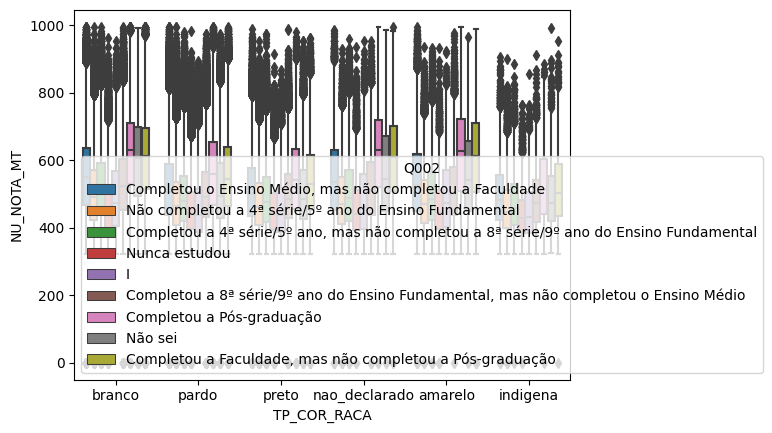

In [ ]:
import seaborn as sns

# Filtra apenas as colunas relevantes para análise
df_2011 = educacao_2011[['NU_NOTA_MT', 'TP_COR_RACA', 'Q003']]
df_2018 = educacao_2018[['NU_NOTA_MT', 'TP_COR_RACA', 'Q002']]
df_2020 = educacao_2020[['NU_NOTA_MT', 'TP_COR_RACA', 'Q002']]

# Renomeia as colunas
df_2011 = df_2011.rename(columns={'Q003': 'Q002'})
df_2018 = df_2018.rename(columns={'Q002': 'Q002'})
df_2020 = df_2020.rename(columns={'Q002': 'Q002'})

# Junta os dataframes
df = pd.concat([df_2011, df_2018, df_2020])

# Transforma a variável Q002 em categórica
df['Q002'] = df['Q002'].replace({
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Cria os boxplots
sns.boxplot(x='TP_COR_RACA', y='NU_NOTA_MT', hue='Q002', data=df)


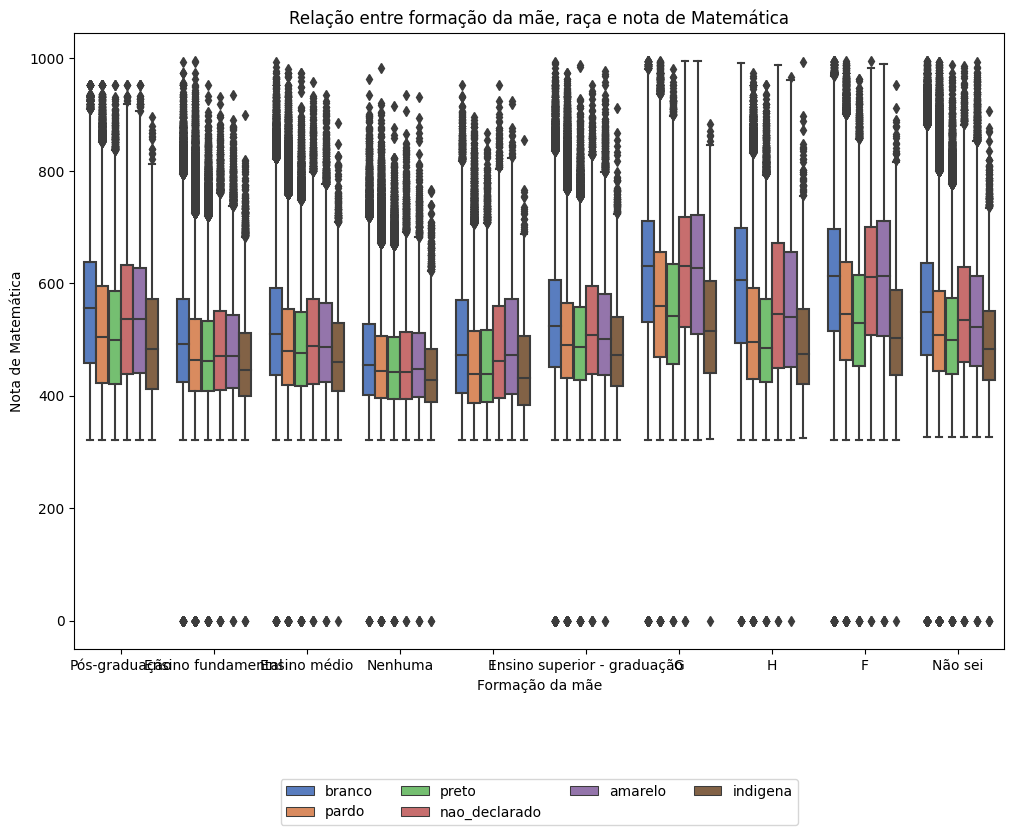

In [ ]:
import matplotlib.pyplot as plt

# Define as variáveis para cada dataframe
df_2011 = educacao_2011[['NU_NOTA_MT', 'TP_COR_RACA', 'Q003']]
df_2018 = educacao_2018[['NU_NOTA_MT', 'TP_COR_RACA', 'Q002']]
df_2020 = educacao_2020[['NU_NOTA_MT', 'TP_COR_RACA', 'Q002']]

# Renomeia as colunas para facilitar a comparação
df_2011 = df_2011.rename(columns={'Q003': 'Formação da mãe'})
df_2018 = df_2018.rename(columns={'Q002': 'Formação da mãe'})
df_2020 = df_2020.rename(columns={'Q002': 'Formação da mãe'})

# Transforma a variável Formação da mãe em categórica
df_2011['Formação da mãe'] = df_2011['Formação da mãe'].replace({
    'A': 'Nenhuma',
    'B': 'Ensino fundamental',
    'C': 'Ensino médio',
    'D': 'Ensino superior - graduação',
    'E': 'Pós-graduação'
})

df_2018['Formação da mãe'] = df_2018['Formação da mãe'].replace({
    'A': 'Nenhuma',
    'B': 'Ensino fundamental',
    'C': 'Ensino médio',
    'D': 'Ensino superior - graduação',
    'E': 'Não sei'
})

df_2020['Formação da mãe'] = df_2020['Formação da mãe'].replace({
    'A': 'Nenhuma',
    'B': 'Ensino fundamental',
    'C': 'Ensino médio',
    'D': 'Ensino superior - graduação',
    'E': 'Não sei'
})

# Junta os dataframes em um só
df_concat = pd.concat([df_2011, df_2018, df_2020])

# Cria o boxplot
plt.figure(figsize=(12,8))
sns.boxplot(data=df_concat, x='Formação da mãe', y='NU_NOTA_MT', hue='TP_COR_RACA', palette='muted')
plt.title('Relação entre formação da mãe, raça e nota de Matemática')
plt.xlabel('Formação da mãe')
plt.ylabel('Nota de Matemática')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()


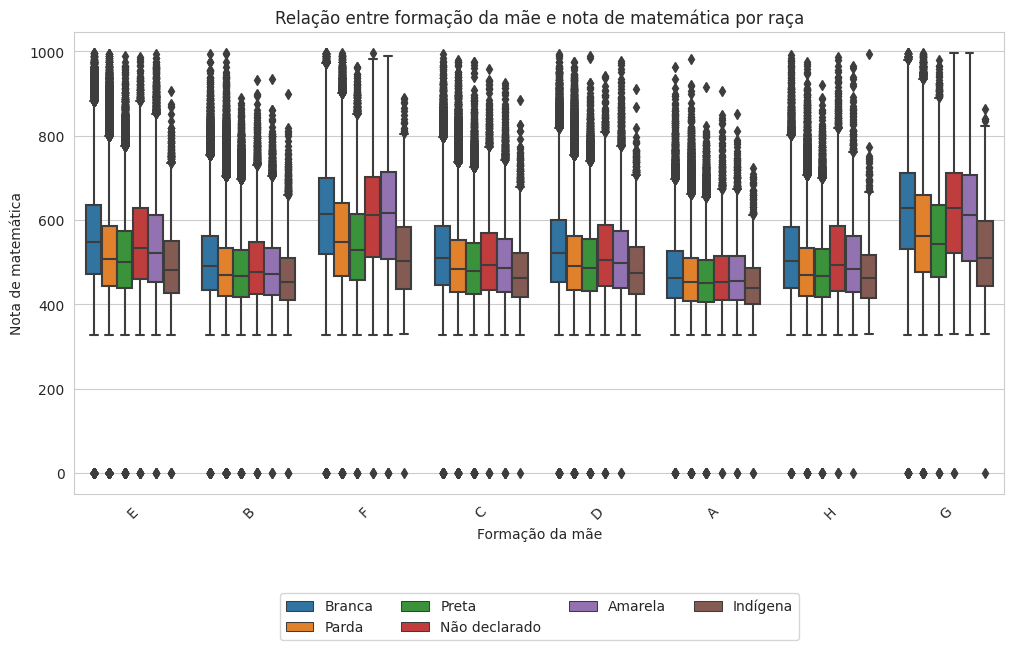

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um dataframe com as informações de interesse
data = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q003', 'TP_COR_RACA']],
                  educacao_2018[['NU_NOTA_MT', 'Q002', 'TP_COR_RACA']],
                  educacao_2020[['NU_NOTA_MT', 'Q002', 'TP_COR_RACA']]])

# Transforma a variável Q003 em categórica
data['Q003'] = data['Q003'].replace({
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Transforma a variável TP_COR_RACA em categórica
data['TP_COR_RACA'] = data['TP_COR_RACA'].replace({
    'nao_declarado': 'Não declarado',
    'branco': 'Branca',
    'preto': 'Preta',
    'pardo': 'Parda',
    'amarelo': 'Amarela',
    'indigena': 'Indígena'
})

# Define o tamanho da figura
plt.figure(figsize=(12, 6))

# Cria o boxplot
sns.set_style('whitegrid')
sns.boxplot(x='Q002', y='NU_NOTA_MT', hue='TP_COR_RACA', data=data)
plt.xlabel('Formação da mãe')
plt.ylabel('Nota de matemática')
plt.title('Relação entre formação da mãe e nota de matemática por raça')
plt.xticks(rotation=45)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()


import matplotlib.pyplot as plt

# código para criar o gráfico

plt.savefig('nome_do_arquivo.jpeg', format='jpeg')


# Salva o gráfico em formato JPEG
plt.savefig('formacaomae', format='jpeg')

# Faz o download do arquivo
from google.colab import files
files.download('nome_do_arquivo.jpeg')




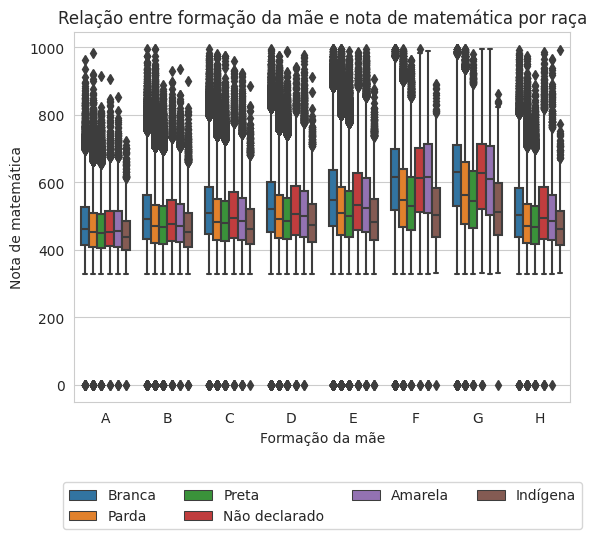

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um dataframe com as informações de interesse
data = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q003', 'TP_COR_RACA']],
                  educacao_2018[['NU_NOTA_MT', 'Q002', 'TP_COR_RACA']],
                  educacao_2020[['NU_NOTA_MT', 'Q002', 'TP_COR_RACA']]])

# Transforma a variável Q003 em categórica
data['Q003'] = data['Q003'].replace({
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Transforma a variável TP_COR_RACA em categórica
data['TP_COR_RACA'] = data['TP_COR_RACA'].replace({
    'nao_declarado': 'Não declarado',
    'branco': 'Branca',
    'preto': 'Preta',
    'pardo': 'Parda',
    'amarelo': 'Amarela',
    'indigena': 'Indígena'
})

# Ordena as categorias do eixo x em ordem alfabética
data['Q002'] = pd.Categorical(data['Q002'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)

# Cria o boxplot
sns.set_style('whitegrid')
sns.boxplot(x='Q002', y='NU_NOTA_MT', hue='TP_COR_RACA', data=data)
plt.xlabel('Formação da mãe')
plt.ylabel('Nota de matemática')
plt.title('Relação entre formação da mãe e nota de matemática por raça')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()


plt.savefig('grafico10.jpeg', dpi=300, bbox_inches='tight')



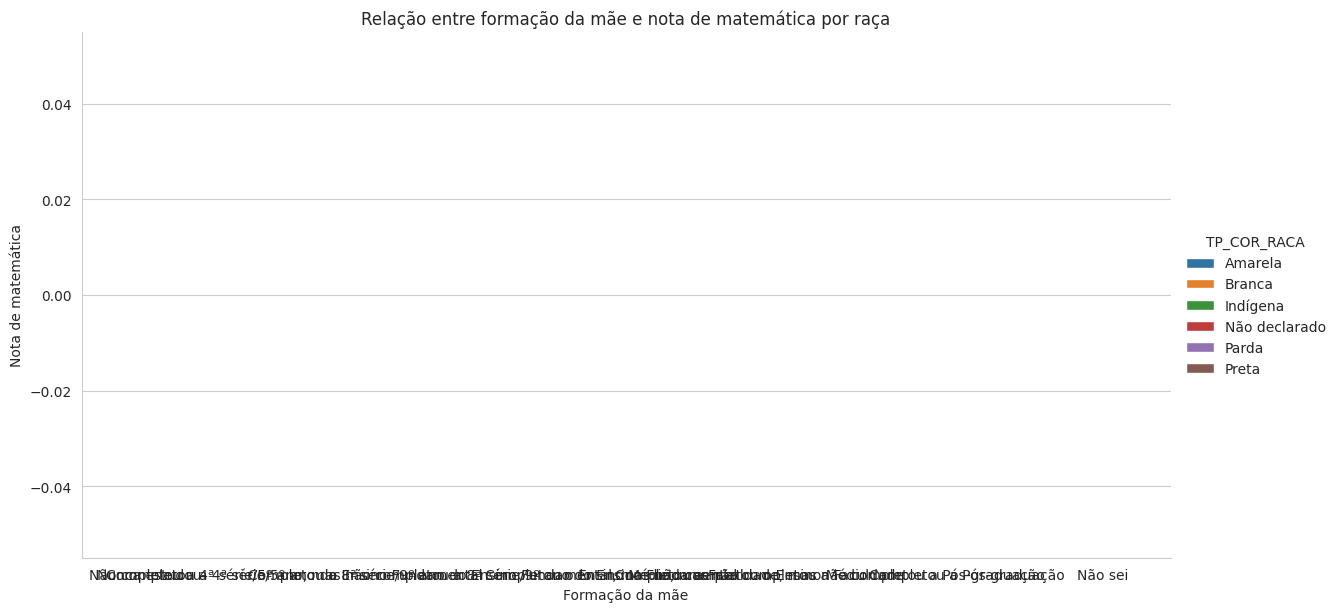

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um dataframe com as informações de interesse
data = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q003', 'TP_COR_RACA']],
                  educacao_2018[['NU_NOTA_MT', 'Q002', 'TP_COR_RACA']],
                  educacao_2020[['NU_NOTA_MT', 'Q002', 'TP_COR_RACA']]])

# Transforma a variável Q003 em categórica
data['Q003'] = data['Q003'].replace({
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Transforma a variável TP_COR_RACA em categórica
data['TP_COR_RACA'] = data['TP_COR_RACA'].replace({
    'nao_declarado': 'Não declarado',
    'branco': 'Branca',
    'preto': 'Preta',
    'pardo': 'Parda',
    'amarelo': 'Amarela',
    'indigena': 'Indígena'
})

# Agrupa os dados por formação da mãe, raça e calcula a média das notas
grouped_data = data.groupby(['Q002', 'TP_COR_RACA'], as_index=False)['NU_NOTA_MT'].mean()

# Ordena as categorias do eixo x em ordem crescente de formação da mãe
cat_order = ['Nunca estudou',             'Não completou a 4ª série/5º ano do Ensino Fundamental',             'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',             'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',             'Completou o Ensino Médio, mas não completou a Faculdade',             'Completou a Faculdade, mas não completou a Pós-graduação',             'Completou a Pós-graduação',             'Não sei']
grouped_data['Q002'] = pd.Categorical(grouped_data['Q002'], categories=cat_order, ordered=True)

# Cria o gráfico de barras
sns.set_style('whitegrid')
g = sns.catplot(x='Q002', y='NU_NOTA_MT', hue='TP_COR_RACA', data=grouped_data,
                kind='bar', height=6, aspect=2)
g.set_xlabels('Formação da mãe')
g.set_ylabels('Nota de matemática')
g.set(title='Relação entre formação da mãe e nota de matemática por raça')
plt.show()

In [ ]:
# Agrupa os dados pela variável Q002
grouped = data.groupby('Q002')

# Calcula o desvio padrão da coluna NU_NOTA_MT para cada grupo
stds = grouped['NU_NOTA_MT'].std()

# Imprime os desvios padrão
print(stds)

Q002
A     78.568542
B     86.131130
C     92.955876
D     96.251928
E    105.461217
F    120.315308
G    122.450394
H     94.924587
Name: NU_NOTA_MT, dtype: float64


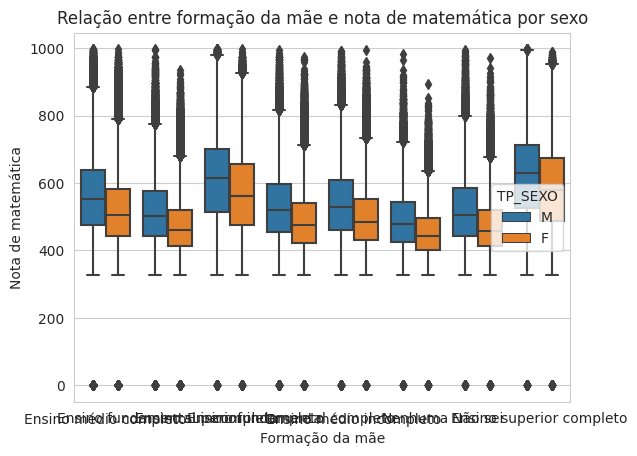

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um dataframe com as informações de interesse
data = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q003', 'TP_SEXO']],
                  educacao_2018[['NU_NOTA_MT', 'Q002', 'TP_SEXO']],
                  educacao_2020[['NU_NOTA_MT', 'Q002', 'TP_SEXO']]])

# Transforma a variável Q003 em categórica
data['Q003'] = data['Q003'].replace({
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Ordena as categorias do eixo x em ordem alfabética
data['Q002'] = data['Q002'].replace({
    'A': 'Nenhuma',
    'B': 'Ensino fundamental incompleto',
    'C': 'Ensino fundamental completo',
    'D': 'Ensino médio incompleto',
    'E': 'Ensino médio completo',
    'F': 'Ensino superior incompleto',
    'G': 'Ensino superior completo',
    'H': 'Não sei'
})

# Cria o boxplot
sns.set_style('whitegrid')
sns.boxplot(x='Q002', y='NU_NOTA_MT', hue='TP_SEXO', data=data)
plt.xlabel('Formação da mãe')
plt.ylabel('Nota de matemática')
plt.title('Relação entre formação da mãe e nota de matemática por sexo')
plt.show()

plt.savefig('grafico10.jpeg', dpi=300, bbox_inches='tight')


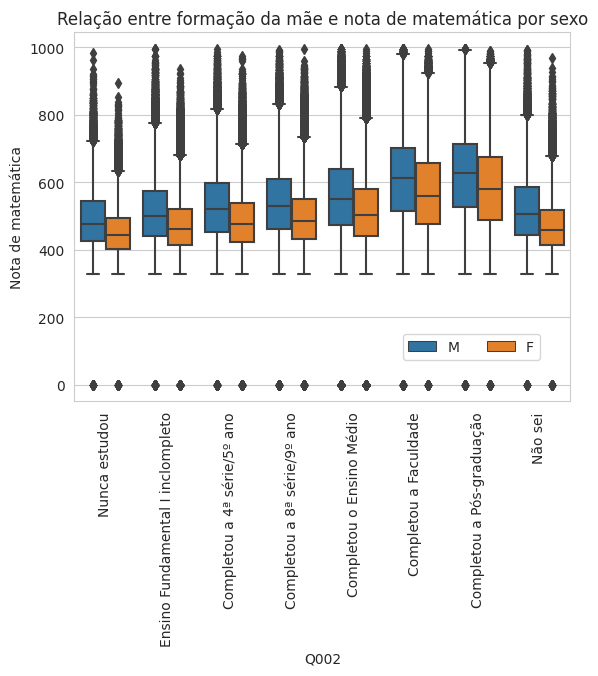

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um dataframe com as informações de interesse
data = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q003', 'TP_SEXO']],
                  educacao_2018[['NU_NOTA_MT', 'Q002', 'TP_SEXO']],
                  educacao_2020[['NU_NOTA_MT', 'Q002', 'TP_SEXO']]])

# Transforma a variável Q003 em categórica
data['Q003'] = data['Q003'].replace({
    'A': 'Nunca estudou',
    'B': 'Ensino Fundamental I inclompleto',
    'C': 'Completou a 4ª série/5º ano',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental',
    'E': 'Completou o Ensino Médio',
    'F': 'Completou a Faculdade',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Cria uma lista com os níveis reais de formação da mãe
levels = ['Nunca estudou', 'Ensino Fundamental I inclompleto', 
          'Completou a 4ª série/5º ano', 
          'Completou a 8ª série/9º ano', 
          'Completou o Ensino Médio', 
          'Completou a Faculdade', 
          'Completou a Pós-graduação', 'Não sei']

# Ordena as categorias do eixo x em ordem alfabética
data['Q002'] = pd.Categorical(data['Q002'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)

# Cria o boxplot
sns.set_style('whitegrid')
sns.boxplot(x='Q002', y='NU_NOTA_MT', hue='TP_SEXO', data=data)
plt.xticks(rotation=90)
plt.xticks(range(8), levels)
plt.ylabel('Nota de matemática')
plt.legend(loc='upper center', bbox_to_anchor=(0.8, 0.2), ncol=2)

plt.title('Relação entre formação da mãe e nota de matemática por sexo')
plt.show()

plt.savefig('grafico10.jpeg', dpi=300, bbox_inches='tight')


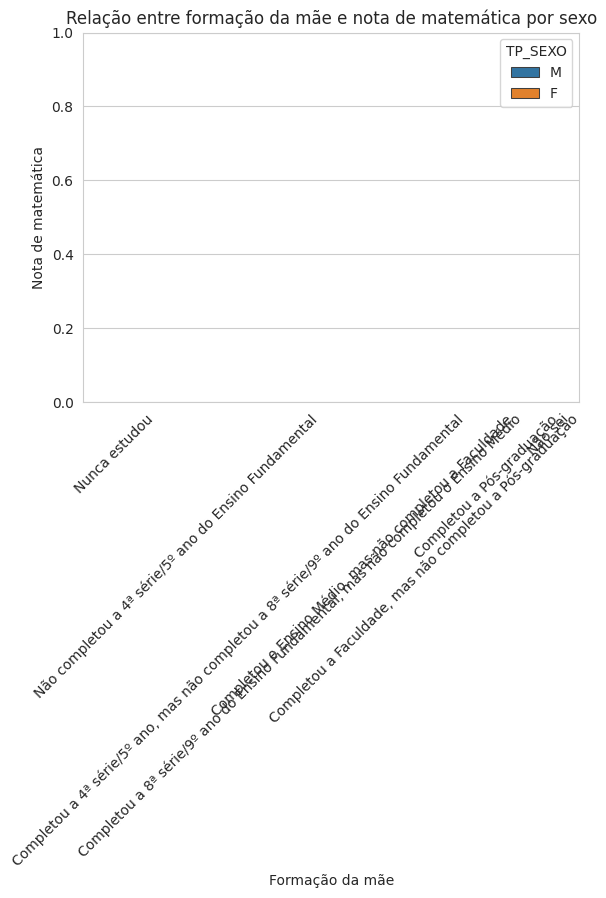

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um dataframe com as informações de interesse
data = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q003', 'TP_SEXO']],
                  educacao_2018[['NU_NOTA_MT', 'Q002', 'TP_SEXO']],
                  educacao_2020[['NU_NOTA_MT', 'Q002', 'TP_SEXO']]])

# Transforma a variável Q003 em categórica
data['Q003'] = data['Q003'].replace({
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Ordena as categorias do eixo x em ordem crescente de escolaridade
data['Q002'] = pd.Categorical(data['Q002'], categories=[
    'Nunca estudou', 
    'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'Completou o Ensino Médio, mas não completou a Faculdade',
    'Completou a Faculdade, mas não completou a Pós-graduação',
    'Completou a Pós-graduação',
    'Não sei'], ordered=True)

# Cria o boxplot
sns.set_style('whitegrid')
sns.boxplot(x='Q002', y='NU_NOTA_MT', hue='TP_SEXO', data=data)
plt.xlabel('Formação da mãe')
plt.ylabel('Nota de matemática')
plt.title('Relação entre formação da mãe e nota de matemática por sexo')
plt.xticks(rotation=45) # Rotaciona os rótulos do eixo x para melhor visualização
plt.show()

plt.savefig('grafico12.jpeg', dpi=300, bbox_inches='tight')


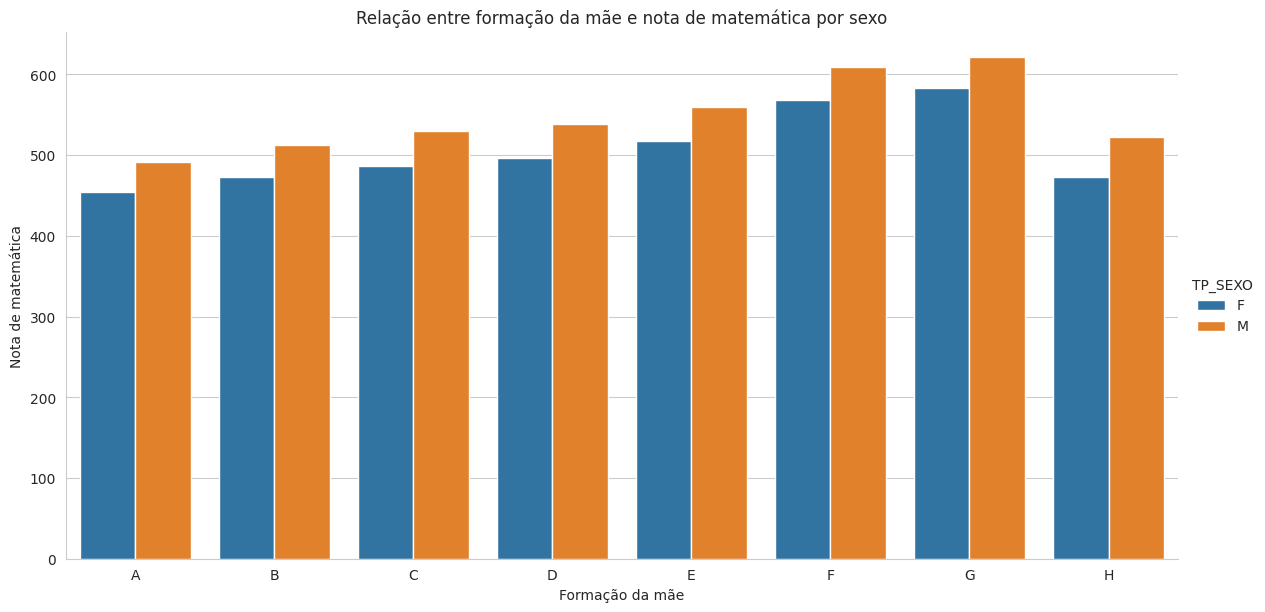

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um dataframe com as informações de interesse
data = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q003', 'TP_SEXO']],
                  educacao_2018[['NU_NOTA_MT', 'Q002', 'TP_SEXO']],
                  educacao_2020[['NU_NOTA_MT', 'Q002', 'TP_SEXO']]])

# Transforma a variável Q003 em categórica
data['Q003'] = data['Q003'].replace({
    'A': 'Nunca estudou',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
    'G': 'Completou a Pós-graduação',
    'H': 'Não sei'
})

# Agrupa os dados por formação da mãe, sexo e calcula a média das notas
grouped_data = data.groupby(['Q002', 'TP_SEXO'], as_index=False)['NU_NOTA_MT'].mean()

# Ordena as categorias do eixo x em ordem alfabética
grouped_data['Q002'] = pd.Categorical(grouped_data['Q002'], ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])

# Cria o gráfico de barras
sns.set_style('whitegrid')
g = sns.catplot(x='Q002', y='NU_NOTA_MT', hue='TP_SEXO', data=grouped_data,
                kind='bar', height=6, aspect=2)
g.set_xlabels('Formação da mãe')
g.set_ylabels('Nota de matemática')
g.set(title='Relação entre formação da mãe e nota de matemática por sexo')
plt.show()


# Salva o gráfico em formato JPEG
plt.savefig('formacaomae5', format='jpeg')

# Faz o download do arquivo
from google.colab import files
files.download('nome_do_arquivo.jpeg')


In [ ]:
data_pai = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q002', 'TP_COR_RACA']],
                      educacao_2018[['NU_NOTA_MT', 'Q001', 'TP_COR_RACA']],
                      educacao_2020[['NU_NOTA_MT', 'Q001', 'TP_COR_RACA']]])

data_pai['Q001'] = pd.Categorical(data_pai['Q001'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)
data_pai['Q002'] = pd.Categorical(data_pai['Q002'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)


data_pai['Q001'] = data_pai['Q001'].replace({
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'G',
    'H': 'H'
})

data_pai['Q002'] = data_pai['Q002'].replace({
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'G',
    'H': 'H'
})




In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cria um dataframe com as informações de interesse
data_pai = pd.concat([educacao_2011[['NU_NOTA_MT', 'Q002', 'TP_COR_RACA']],
                      educacao_2018[['NU_NOTA_MT', 'Q001', 'TP_COR_RACA']],
                      educacao_2020[['NU_NOTA_MT', 'Q001', 'TP_COR_RACA']]])

# Transforma a variável Q001 e Q002 em categórica
data_pai['Q001'] = data_pai['Q001'].replace({
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'G',
    'H': 'H'
})

data_pai['Q002'] = data_pai['Q002'].replace({
    'A': 'A',
    'B': 'B',
    'C': 'C',
    'D': 'D',
    'E': 'E',
    'F': 'F',
    'G': 'G',
    'H': 'H'
})

# Transforma a variável TP_COR_RACA em categórica
data_pai['TP_COR_RACA'] = data_pai['TP_COR_RACA'].replace({
    'nao_declarado': 'Não declarado',
    'branco': 'Branca',
    'preto': 'Preta',
    'pardo': 'Parda',
    'amarelo': 'Amarela',
    'indigena': 'Indígena'
})

# Ordena as categorias do eixo x em ordem alfabética
data_pai['Q001'] = pd.Categorical(data_pai['Q001'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)
data_pai['Q002'] = pd.Categorical(data_pai['Q002'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], ordered=True)

# Cria o boxplot
sns.set_style('whitegrid')
sns.boxplot(x='Q002', y='NU_NOTA_MT', hue='TP_COR_RACA', data=data_pai)
plt.xlabel('Formação do pai')
plt.ylabel('Nota de matemática')
plt.title('Relação entre formação do pai e nota de matemática por raça')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)
plt.show()


# Salva o gráfico em formato JPEG
plt.savefig('formacaomae6', format='jpeg')

# Faz o download do arquivo
from google.colab import files
files.download('nome_do_arquivo.jpeg')
